In [1]:
load('graph_entropy.py')
load('ge_visualize.sage') 
np.set_printoptions(threshold=np.inf)

import scipy
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
from sage.graphs.graph_coloring import first_coloring 
import math
import networkx as nx
import matplotlib.pyplot as plt

# Generate formatted vertex labels in the construction of directed line graph
# Input: Vertices e1 and e2 where e1-e2 forms a directed 2-walk in the original graph
# Output: Vertex label used in the directed line graph of format "[e1,e2]"
def vertex_name(e1, e2):
    return "[" + str(e1) + "," + str(e2) + "]"


# Construct the directed line graph of a directed graph G
# Input: A directed graph G. 
#        It must be a directed graph. Otherwise, we will throw a ValueError and return None.
# Output: The directed line graph of G. 
def directed_line_graph(G): 
    try:
        if not G.is_directed():
            raise ValueError()
    except ValueError:
        print("ValueError: G must be directed. Returning None.")
        return None
    E = G.edges() 
    adjacency_list = {}
    for e1, e2, v in E:
        neighbor = []
        for e3, e4, u in E:
            if not (str(e1) == str(e3) and str(e2) == str(e4)) and (str(e1) == str(e4) or str(e2) == str(e3)):
                neighbor.append(vertex_name(e3,e4))
            
        adjacency_list[vertex_name(e1,e2)] = neighbor
    G = Graph(adjacency_list)
    return G

# Calculate and return the dot product of two vectors a and b.
def dot_product(a, b):
    return sum(x*y for x, y in zip(a, b))

# Determine if two vectors are orthogonal, considering a numerical error threshold epsilon.
def is_orthogonal(a, b, epsilon=1e-10):
    return abs(dot_product(a, b)) < epsilon


# Convert a vector to its string representation.
def vector_to_str(vector):
    return str(vector)

# Find all orthogonal pairs of vectors in the input and return a dictionary of these pairs
# Input: A list of vectors
# Output: A dictionary, the key is each vector in the input. 
#         The value of each key is a list containing all vectors orthogonal to the key.
def find_orthogonal_vectors(vectors, epsilon=1e-10):
    orthogonal_vectors = {}  # Initialize the dictionary to store the result
    
    # Iterate over each vector in the input list
    for i, v_i in enumerate(vectors):
        orthogonal_list = []  # List to store vectors orthogonal to v_i
        
        # Check orthogonality with every other vector, considering epsilon
        for j, v_j in enumerate(vectors):
            if i != j and is_orthogonal(v_i, v_j, epsilon):  # If orthogonal within epsilon
                orthogonal_list.append(vector_to_str(v_j))  # Add to the list of orthogonal vectors
        
        # Map the current vector to its list of orthogonal vectors
        orthogonal_vectors[vector_to_str(v_i)] = orthogonal_list
    
    # Convert tuples back to lists for the final output
    return orthogonal_vectors 




# Determine if the fractional coloring is exactly 3 and all constraint are satisfied without numerical error.
# We use integer arithmetic to avoid the numerical error.
# Input: vertices: the vertex set  
#        denominator: The denominator explained in the end of Chunk 5
#        enumerators: The enumerators explained in the end of Chunk 5
#
# Output: False if some constraint is violated or the value is not exactly 3
#         True if it passes all checking.
def check(vertices, enumerators, denominator):
    succ = True
    
    #This loop checks that Mx >= 1 is true, by checking each row is satisfied.
    for v in vertices:
        val = int(0) 
        for row in enumerators:
            # sum up all X_I s.t. v is in the set I 
            if v in row["ind_set"]:
                val = val + int(row["weight"])
                
        # If the value is less than k, one constraint is violated.        
        if val < denominator:
            print("A constraint is not satisfied:")
            print(v)
            print(val)
            succ = False
            break
    val = int(0)
    for row in enumerators:
        val = val + int(row["weight"]) 
    for v in vertices:
        val = val
    if val != int(3 * denominator):
        print("The value is not exact:")
        print("3 * denominator: ", int(3 * denominator) )
        print("sum: ",val)
        succ = False 
    return succ

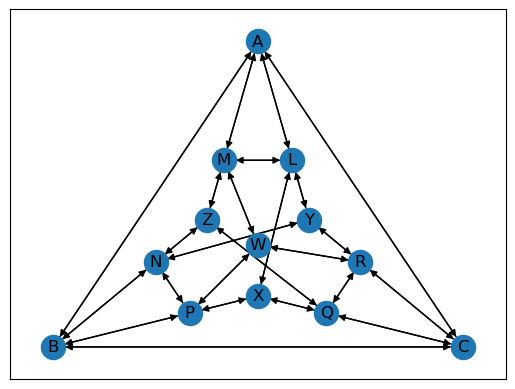

In [2]:
vectors = [
    [1, 0, 0],  #A
    [0, 1, 0],  #B
    [0, 0, 1],  #C
    [0, 1, -1], #M
    [0, 1, 1],  #L
    [1, 0, -1], #P
    [1, 0, 1],  #N
    [1, -1, 0], #R
    [1, 1, 0],  #Q
    [1, 1, 1],  #W
    [1, 1, -1], #Y
    [1, -1, 1], #X
    [-1, 1, 1]  #Z
]

orthogonal_dict = find_orthogonal_vectors(vectors)
G = DiGraph(orthogonal_dict)
G.vertices(sort=True)
labels = list(["Z","C","M","B","L","R","X","P","A","N","Y","Q","W"]) 

G.relabel(perm=labels) 
G.vertices(sort=True)

 
networkx_G = G.networkx_graph() 
scale = 24
pos_dict = {
    'W' : (0*scale, 0*scale),
    'X' : (0*scale, -1 *scale),
    'Y' : (math.sqrt(3)*scale/2, 1/2*scale),
    'Z' : (-math.sqrt(3)*scale/2, 1/2*scale), 
    'M' : (-math.sqrt(3)*scale/3, 5/3 *scale),
    'L' : (math.sqrt(3)*scale/3, 5/3 *scale),
    'N' : (-math.sqrt(3)*scale, -1/3 *scale),
    'P' : (-2*math.sqrt(3)*scale/3, -4/3 *scale),
    'R' : (math.sqrt(3)*scale, -1/3*scale),
    'Q' : (2*math.sqrt(3)*scale/3, -4/3 *scale),
    'A' : (0*scale, 4 * scale),
    'B' : (-2*math.sqrt(3)*scale, -2 *scale),
    'C' : (2*math.sqrt(3)*scale, -2 *scale),
}
nx.draw_networkx(networkx_G, pos_dict, arrowstyle="<|-")
plt.show() 

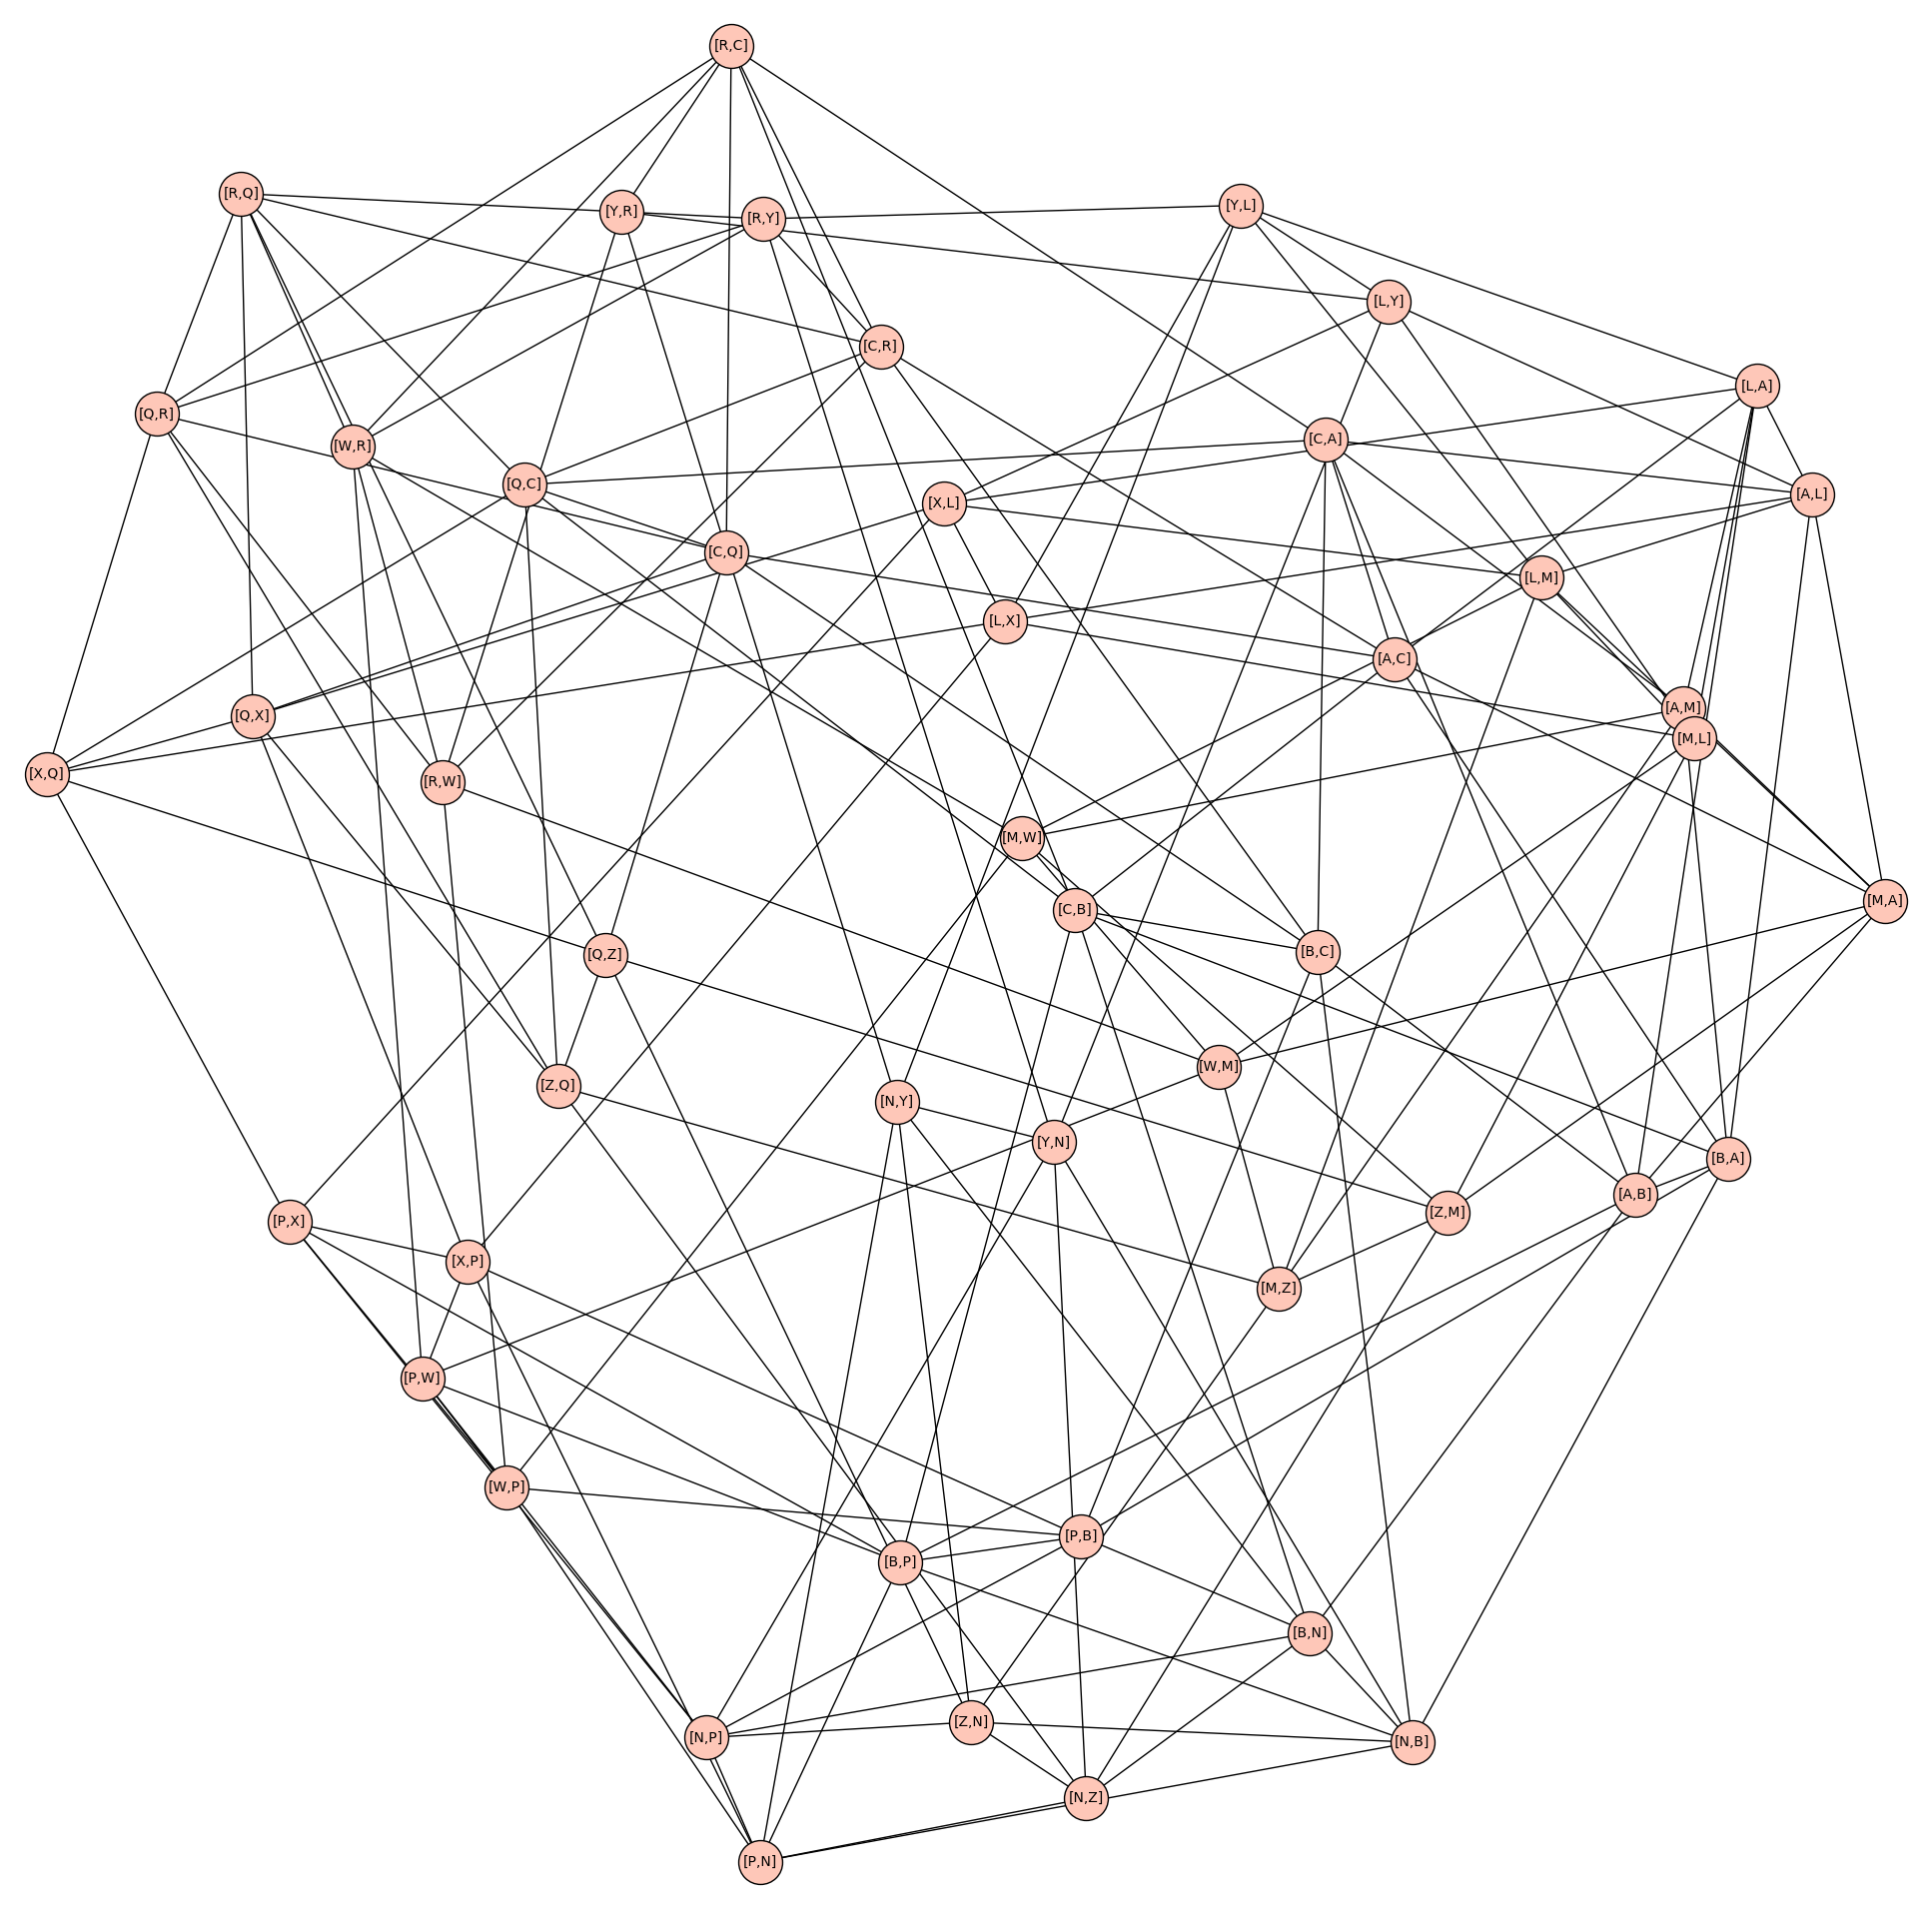

In [3]:
H =  directed_line_graph(G);
vertices = H.vertices(sort=True)
H.plot(vertex_size=1000).show(figsize=[25.6,19.2]) 

# Chunk 1 Chromatic number of $L(G_{13})$

Chromatic entropy of $L(G_{13})$ is calculated by built-in method from Sagemath

In [4]:
from sage.graphs.graph_coloring import chromatic_number
print(chromatic_number(H))

4


Therefore, the numerical verfication is that 

# $\chi(L(G_{13})) = 4$

# Chunk 2 Lower bound of Chromatic Entropy of $L(G_{13})$

Here, we calculate the independence number of $H$.

Firslty, we use the Bron–Kerbosch Algorithm to enumerate all maximal indepdent sets.
This algorithm is implemented by Harangi, Niu and Bai. 

To be more precise, Bron–Kerbosch Algorithm enumerates all maximal cliques of a graph. Maximal indepdent sets are obtained by taking graph complement.

Next, we find the largest independent set in the enumeration.

In [5]:
G = H.networkx_graph()     
ind_sets = find_ind_sets(G)
(n, m) = ind_sets.shape
alpha = 0
index_min = 0
for i in range(n):
    if sum(ind_sets[i,:]) > alpha:
        alpha =sum(ind_sets[i,:])
        index_min = i
print('independence number', alpha) 

independence number 18


The following function takes array $V=[x_1,x_2,\dots,x_n]$ as an input where each $x_i$ is a positive integer.

Denotes $sum_v=sum(V)$. Then 
$$
P = [\frac{x_1}{sum_v},\frac{x_2}{sum_v},\dots,\frac{x_n}{sum_v}]
$$
is a probability distribution. The function  calculates the Shannon entropy of $P$.

In [6]:
def entropy_positive_vec(v):
    sum_v = sum(v)
    v_np = np.array(v) / sum_v
    return scipy.stats.entropy(v, base = 2)

In [7]:
print("output of [1,1]:", entropy_positive_vec([1,1]))
print("output of [1,1,1,1]:", entropy_positive_vec([1,1,1,1]))

output of [1,1]: 1.0
output of [1,1,1,1]: 2.0


Now, we enumerates all $p_1\ge p_2 \ge \dots \ge p_k$ such that
\begin{align}
&p_1\ge p_2 \ge \dots \ge p_k\\
&\sum_{i=1}^kp_i=|V(L(G_{13}))| = 48\text{ and }p_i\le 18, \forall i\in[k]
\end{align}
And calculate find $p_1,\dots,p_k$ that minimize
$$
 \sum_{i=1}^k - \frac{p_i}{|V(L(G_{13}))|} \log_2 \Big (\frac{p_i}{|V(L(G_{13}))|}\Big )
$$
(Note $|V(L(G_{13}))|=48=\sum_{i=1}^kp_i$.)

In Sagemath, the above $p_1,\dots,p_k$ is knowns as an integer partition of 48 with min_length$=4$ and max_part$=18$.

In [9]:
x =  Partitions(48, min_length=4, max_part = 18).list()
minimum = 100000
min_idx = -1
for i in range(len(x)):
    v_i = np.array(x[i])
    if v_i[0] > 18:
        continue
    temp_entro = entropy_positive_vec(np.array(v_i))
    if temp_entro < minimum:
        minimum = temp_entro
        min_idx = i 
v = x[min_idx] 
print("The minimum value:", entropy_positive_vec(np.array(v))) 
print("The minimizer:", x[min_idx])

The minimum value: 1.664732337035041
The minimizer: [18, 18, 11, 1]


Therefore, we conclude

# $ H_{\chi}(L(G_{13}),X)\ge 1.66$